In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data      # 原始特征：共4个特征
y = iris.target    # 类别：0, 1, 2

# 为了获得一个一维投影（便于画出决策线），这里只取前两个类别（例如：setosa 和 versicolor）
mask = y < 2
X = X[mask]
y = y[mask]

# 只选择两个特征，例如：花萼长度（第0个特征）和花瓣长度（第2个特征）
X = X[:, [0, 2]]

In [11]:
# 使用 sklearn 的 LDA 模型进行训练，n_components=1 表示投影到一维
lda = LinearDiscriminantAnalysis(n_components=1) 
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1)

In [12]:
# 对于两类问题，LDA 模型的决策边界在原始特征空间上由一个线性方程表示：
# decision_function(x) = w[0]*x[0] + w[1]*x[1] + intercept = 0
# 这里，lda.coef_ 返回一个 [1, n_features] 的数组，lda.intercept_ 返回决策截距
w = lda.coef_[0]
b = lda.intercept_[0]
print("LDA判别向量 w:", w)
print("LDA截距 b:", b)

LDA判别向量 w: [-11.10897298  31.11656937]
LDA截距 b: -28.247313782218058


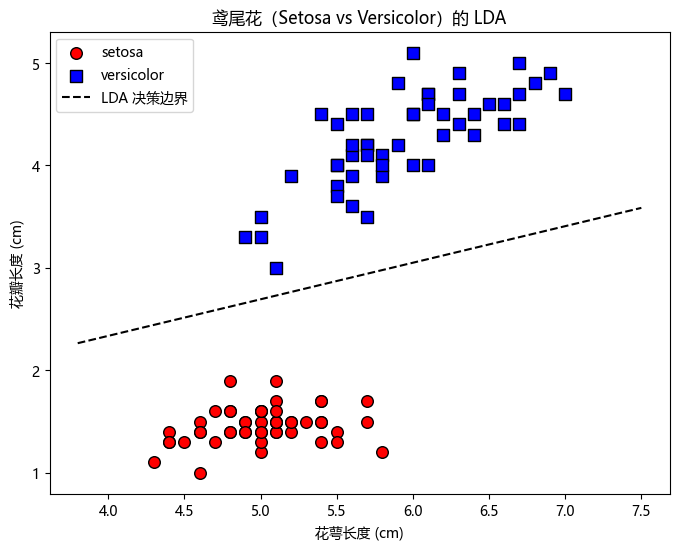

In [18]:
# 绘制原始数据的散点图
plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
markers = ['o', 's']
labels = iris.target_names[:2]  # 对应 setosa 与 versicolor
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                color=color, marker=marker, label=labels[label],
                edgecolor='k', s=70)
plt.xlabel("花萼长度 (cm)")
plt.ylabel("花瓣长度 (cm)")
plt.title("鸢尾花（Setosa vs Versicolor）的 LDA")

# 计算并绘制决策边界
# 决策边界方程： w[0]*x + w[1]*y + b = 0
# 解 y 得： y = -(w[0]/w[1])*x - b/w[1]
x_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
y_vals = - (w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='LDA 决策边界')

plt.legend()
plt.show()